# Bay Wheels (Ford Go Bike) Exploration and Visualization for yeay 2018
## by (Ahmed Mohamed Oweda)

## Preliminary Wrangling

Bay Wheels (previously known as Ford GoBike) is a public bike sharing system in the San Francisco Bay Area in California.The dataset used for this exploratory analysis consists of files containing monthly individual trip data from January 2018 to December 2018 in CSV format.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Since our dataset consists of 12 files , one file for each month in the year 2018 , so we will read them and concatenate them here to form one big complete dataset for our analysis 

In [2]:
import glob

files = glob.glob('FordGoBikes2018/*.csv') #we are using * to include all files of the dataset
files

['FordGoBikes2018\\201801-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201802-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201803-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201804-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201805-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201806-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201807-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201808-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201809-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201810-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201811-fordgobike-tripdata.csv',
 'FordGoBikes2018\\201812-fordgobike-tripdata.csv']

In [3]:
#read each file and concatenate it to the previous file to make the master dataset
df = pd.concat([pd.read_csv(file) for file in files], ignore_index = True)

In [4]:
#store the master dataset into a csv file 
df.to_csv('Master_Bikes2018_dataset.csv') 

**we will now assess now the dataset visually and programmatically** 

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [6]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No
1863720,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,No


In [7]:
df.shape

(1863721, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [9]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [10]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [11]:
df.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [12]:
#Check for duplicated rows
df.duplicated().sum()

0

### What is the structure of your dataset?

* The dataset consists of 1863721 rows and 14 columns 
* The column types are float , int and strings
* The column can be classified into :
   * trip duration: duration_sec, start_time, end_time
   * station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id,            end_station_name, end_station_latitude, end_station_longitude
   * other: bike_id, user_type, bike_share_for_all_trip


### What is/are the main feature(s) of interest in your dataset?

* Duration of the trips 
* starting and ending time of trips
* Starting and ending stations 
* Types of customers 

so we will ask some questions like : 

When are most trips taken in terms of time of day, day of the week, or month of the year?
How long does the average trip take?
Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features like trips duration , start time and end time will help me to identify the mean trips durations and the most common time in which the trips are active and the attributes of the bikes and the users like bike id and user type

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**Before we start Exploration , we should clean the dataset from some issues that we found** 

Quality Issues : 
* Some columns types need to be changed to datetime as start time and end time 
* Some rows have null values in the start station and end stations id 
* User_type and bike_share_for_all_trip need to be changed to category type instead of string beacuse it contains only two   values
* start station id and end station id need to be changed to int type instead of floats 
* Since we the latitude and longitude columns will not be useful to us , we will compute the distance between the starting point and ending point , and store it in a new column 'distance'
* We need also to extract useful information from datetime columns such as starting day , month and hour 

Tidiness Issues :
* No Tidiness issues are found 

### cleaning process

##### 1-Define

We need to drop the rows which have null values in starting and ending stations IDs

##### 1-Code

In [13]:
#drop any row with null values in the specified columns in the subset parameter
df.dropna(axis=0, subset=['start_station_id','start_station_name','end_station_id','end_station_name'],inplace=True)

##### 1-Test

In [14]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

##### 2-Define

Some column types need to be changed 

##### 2-Code

In [15]:
#change time to datetime type
df["start_time"]= pd.to_datetime(df["start_time"])
df["end_time"]= pd.to_datetime(df["end_time"])


In [16]:
#change id columns to int instead of float
df.start_station_id = df.start_station_id.astype('int64') 
df.end_station_id = df.end_station_id.astype('int64') 


In [17]:
#User_type and bike_share_for_all_trip from strings to category
for col in ['bike_share_for_all_trip', 'user_type']:
    df[col] = df[col].astype('category')

##### 2-Test

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         int64         
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int64         
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
dtypes: category(2), datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 187.2+ MB


##### 3-Define

We will calculate the distance between start point and end point using the latitude and longitiude and store them in a new column, after that we will drop the latitude and longitiude columns because we will not use them  

As part of my study in college in Engineering Topographic surveying subject , we studied some formulas to calculate the distances between two points using the latitude and longitiude , but the easiest one is **Haversine
formula** which gives the shortest distance , ignoring the effect of earth natural terrain like hills and mountains or valleys

Haversine formula: $$distance = R ⋅ c$$
where c can be calculated from : $$c = 2 ⋅ atan2( √a, √(1−a))$$
where a can be calculated from : $$a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)$$


where R is earth’s radius (mean radius = 6,371km) , φ is latitude, λ is longitude .
The angles need to be in radians measure not in degree measure .

##### 3-Code

In [19]:
import math
def get_distance(lat1,lat2,lon1,lon2):
    R = 6373.0  #radius of the Earth


    lat1 = math.radians(lat1) #coordinates
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1   #change in coordinates
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance





In [20]:
#use apply function to calculate the distance 
df['Distance'] = df.apply(lambda x: get_distance(x['start_station_latitude'],x['end_station_latitude'],x['start_station_longitude'],x['end_station_longitude']),axis=1)


##### 3-Test

In [21]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,Distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,2.493036
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,2.975436
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,2.050354
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,2.441337


##### 4-Define

We need to extract some info from the dateTime columns as the starting day , month and hour and store that info in new column 

##### 4-Code

In [22]:
from datetime import datetime 
#By using the abbreviations and the dt accessor
df['starting_hour'] = df['start_time'].dt.strftime("%H")
df['starting_WeekDay'] = df['start_time'].dt.strftime("%a")
df['starting_month'] = df['start_time'].dt.strftime("%b")

In [23]:
# List of days in order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# create ordered categorical variable
df['starting_WeekDay'] = pd.Categorical(df['starting_WeekDay'],
                                      categories= day_order, # use order list
                                      ordered = True)

##### 4-Test

In [24]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,Distance,starting_hour,starting_WeekDay,starting_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,2.493036,22,Wed,Jan
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,0.000000,16,Wed,Jan
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,2.975436,14,Wed,Jan
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,2.050354,14,Wed,Jan
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,2.441337,19,Wed,Jan


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Before we begin we will store the cleaned dataset in a new csv file  

In [25]:
#store the master cleaned dataset into a csv file 
df.to_csv('Master_Bikes2018_dataset_Cleaned.csv') 

##### -<span style="color:red">Plotting the distribution of trips duration 

Text(0, 0.5, 'count')

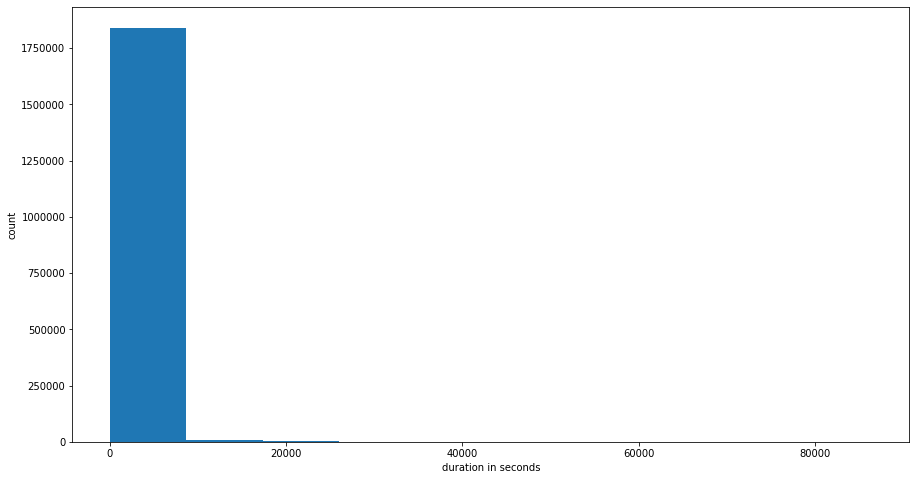

In [26]:
plt.figure(figsize = [15, 8]) 
plt.hist(data = df, x = 'duration_sec')
plt.xlabel('duration in seconds')
plt.ylabel('count')


We have to make log scale on the x-axis to show the distribution of the trips duration

(array([   30,   100,   250,   500,  1000,  2500,  5000, 10000, 30000,
        60000, 80000]),
 <a list of 11 Text xticklabel objects>)

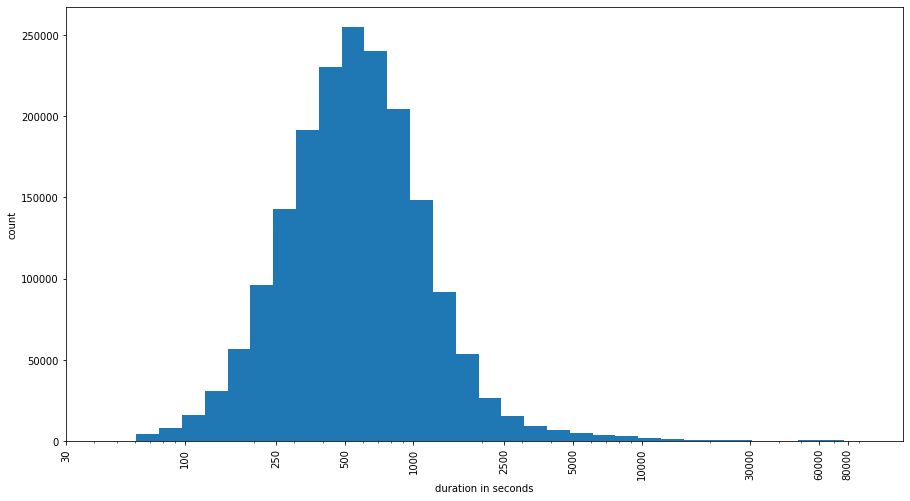

In [27]:
#from udacity lessons 
plt.figure(figsize = [15, 8]) 
bin_edges = 10 ** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())+0.1, 0.1)
plt.hist(df.duration_sec, bins = bin_edges)
plt.xscale('log')
tick_locs = [30, 100,250,500, 1000,2500, 5000, 10000,30000 , 60000,80000]
plt.xlabel('duration in seconds')
plt.ylabel('count')
plt.xticks(tick_locs, tick_locs)
plt.xticks(rotation = 90)



**As we can see from the histogram , the majority of the trips have durations between 500 to 1000 seconds , while nearly 90% of trips have durations from 100 to 5000 seconds , and a very little portion of trips exceeded 1000 seconds in their duration** 

##### -<span style="color:red">Plotting the distribution of user type

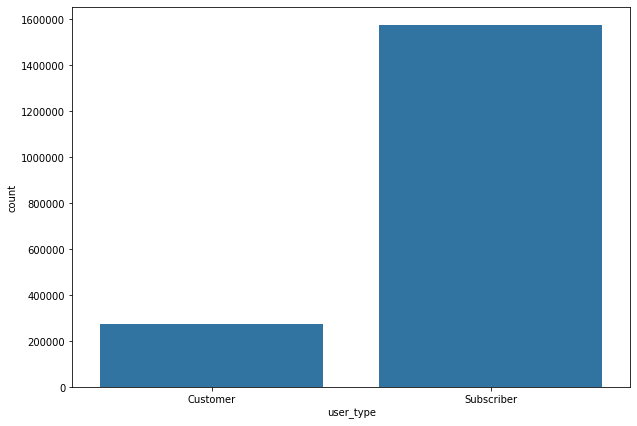

In [28]:
plt.figure(figsize = [10, 7]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)

**From the bar chart above , the number of subscribers which is nearly 1,600,000 are much more than the number of customers which is nearly 300,000**

##### -<span style="color:red">Plotting the distribution of bike share for all trip

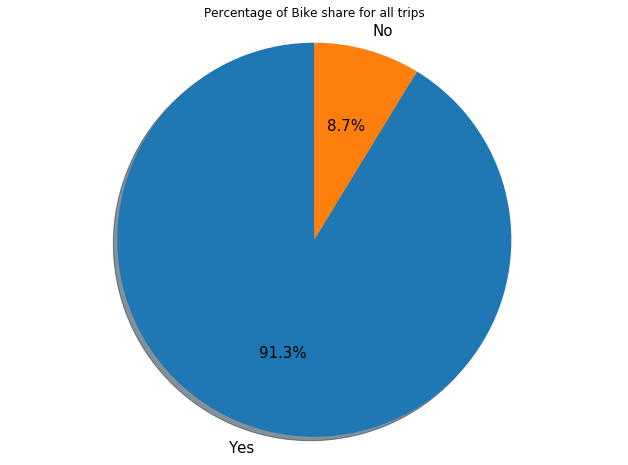

In [29]:
#Create a pie chart with percentage labels using matplotlib
labels = ['Yes','No']
sizes = df.bike_share_for_all_trip.value_counts()
textprops = {"fontsize":15}  

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 ,textprops =textprops)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Bike share for all trips')
fig2.set_size_inches(11,8)
plt.show()

**From the Pie chart above , it is clear that 91.3% from the total dataset has bike shared for all the trips** 

##### -<span style="color:red">Plotting the distribution starting week-day and starting month for all trip

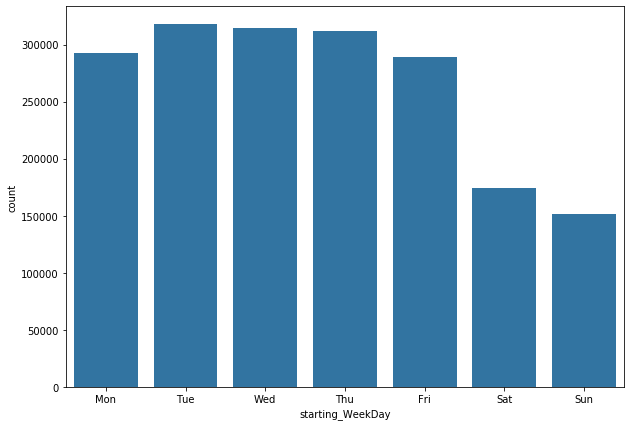

In [30]:
#plot the starting week day
plt.figure(figsize = [10, 7]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'starting_WeekDay', color = base_color)

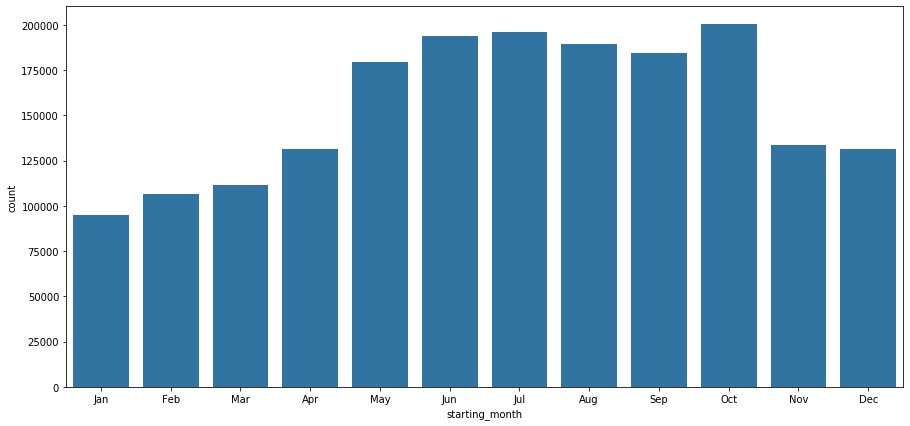

In [31]:
#plot the starting month
plt.figure(figsize = [15, 7]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'starting_month', color = base_color)

**From the above plots** 
* It is surprisingly noticed that the week end days ( sat & sun ) has the least amount of trips while (Tue & Wed ) has the highst amount of trips
* However in the monthly distribution , Summer months (jun , jul , Aug and sep) have the highst amount of trips from winter months

##### -<span style="color:red">Plotting the distribution of distances in KM for all trip

Text(0, 0.5, 'count')

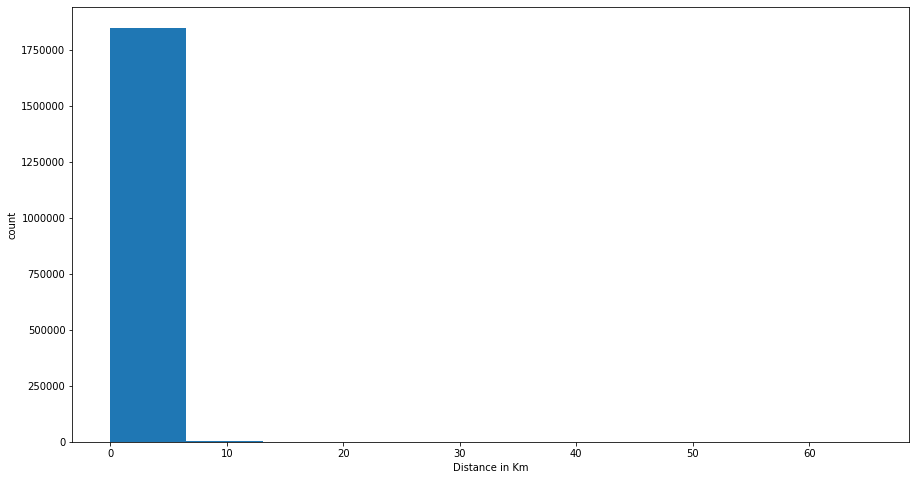

In [32]:
plt.figure(figsize = [15, 8]) 
plt.hist(data = df, x = 'Distance')
plt.xlabel('Distance in Km')
plt.ylabel('count')

We have to make scale transformation to show the distribution 

([<matplotlib.axis.XTick at 0x104eaec8>,
 <a list of 7 Text xticklabel objects>)

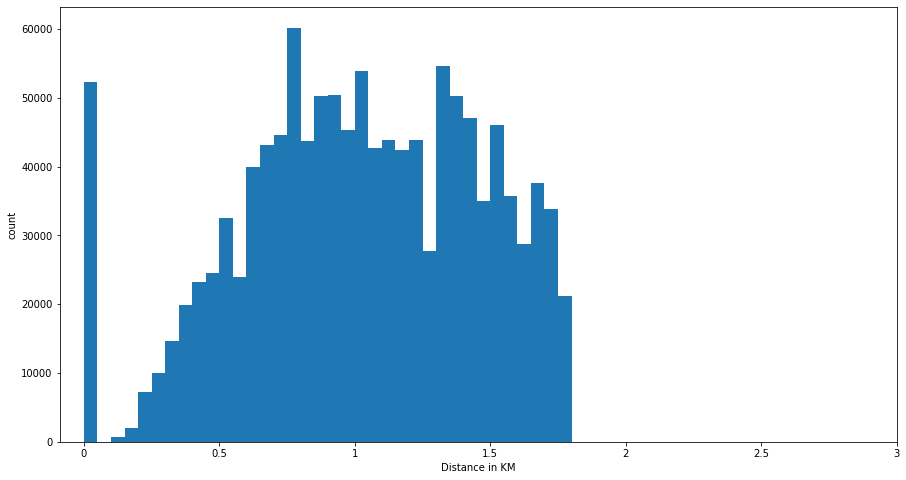

In [33]:
plt.figure(figsize = [15, 8]) 
bin_edges =np.arange(0, np.log10(df.Distance.max()+0.05), 0.05)
plt.hist(df.Distance, bins = bin_edges)
#plt.xscale('log')
tick_locs = [0 ,0.5 ,1 , 1.5 , 2 , 2.5 , 3]
#tick_locs = [0 ,10 ,20,30 , 40 , 50 , 60 , 70]
plt.xlabel('Distance in KM')
plt.ylabel('count')

plt.xticks(tick_locs,tick_locs)

**The most Shown property here is there are a lot of trips which have zero distance !!! how come that 
It seems that the trips dont have a linear staright path between the starting point and the ending point , but it might be a circular path with rounds .** 

##### -<span style="color:red">Plotting the distribution of starting point of the trips 

In [34]:
n_points = df.shape[0]
max_count = df['start_station_name'].value_counts().max()
max_prop = max_count / n_points

tick_props = np.arange(0, max_prop, 0.005)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

Text(0.5, 0, 'proportion of starting points')

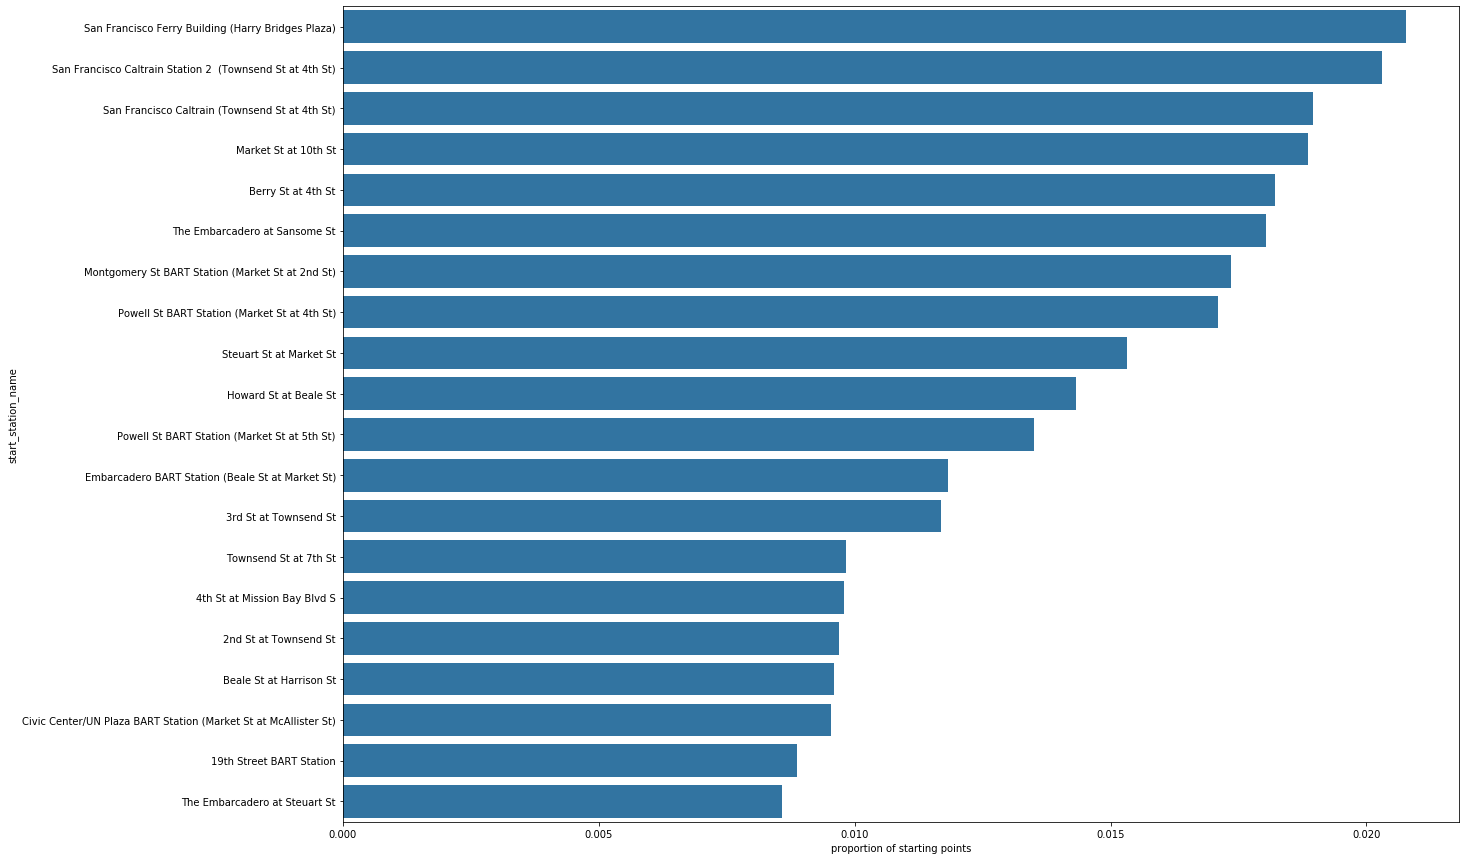

In [35]:
plt.figure(figsize = [20, 15]) 
base_color = sb.color_palette()[0]
order = df.start_station_name.value_counts().nlargest(20).index
sb.countplot(data = df, y= 'start_station_name', color = base_color , order =order)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion of starting points')

**From the horizontal bar chart , it is shown that the highst starting point has only nearly 2% of the overall trips , so it seems that there are a lot of starting points in the dataset**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes , in the histogram of the duration of the trips and the distance of the trips , we had to make log scale tranformations on the x-axis to see the distribution 
> Lots of trips have ditsances equals zero which indicates a rounded path of the trip 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No the data was tidy enough and we had only to make some scale transformations 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##### -<span style="color:red">Plotting the relation betwen type of customer and trip duration 

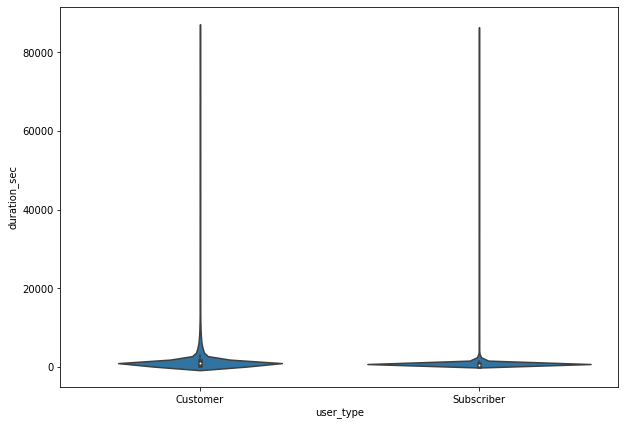

In [36]:
plt.figure(figsize = [10, 7]) 
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'user_type', y ='duration_sec', color = base_color)

**It is observed from the plot that the relation between the user type and the duration that the user type has no effect on the trip duration , as both have the same distribution with most of the values are small duration trips , but also some trips have very large durations that exceeds 80k seconds (around 22 hours )**

##### -<span style="color:red">Plotting the relation betwen type of customer and starting week day

In [37]:
#plotting a heat map between the two categrical variables 
#from udacity lessons 
ct_counts = df.groupby(['user_type', 'starting_WeekDay']).size()
ct_counts

user_type   starting_WeekDay
Customer    Mon                  33406
            Tue                  33773
            Wed                  34912
            Thu                  37121
            Fri                  41064
            Sat                  52239
            Sun                  44444
Subscriber  Mon                 259472
            Tue                 283767
            Wed                 279583
            Thu                 275137
            Fri                 247682
            Sat                 121901
            Sun                 107449
dtype: int64

In [38]:
#resetting the index
ct_counts=ct_counts.reset_index(name='count')

In [39]:
#create the pivot table
ct_counts=ct_counts.pivot(index = 'starting_WeekDay', columns = 'user_type', values = 'count')

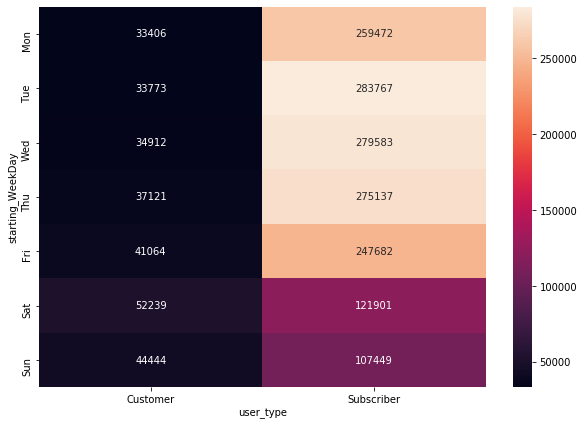

In [40]:
plt.figure(figsize = [10, 7]) 
sb.heatmap(ct_counts, annot = True, fmt = 'd')

**From the heatmap , we notice that the highest count of trips for the subscriber type is on Tuesday and the lowest count of trips is on Sunday.<br>
while for the customer , the highst count of trips is on Saturday and the lowest count is on Monday**

##### -<span style="color:red">Plotting the relation betwen type of customer and starting month

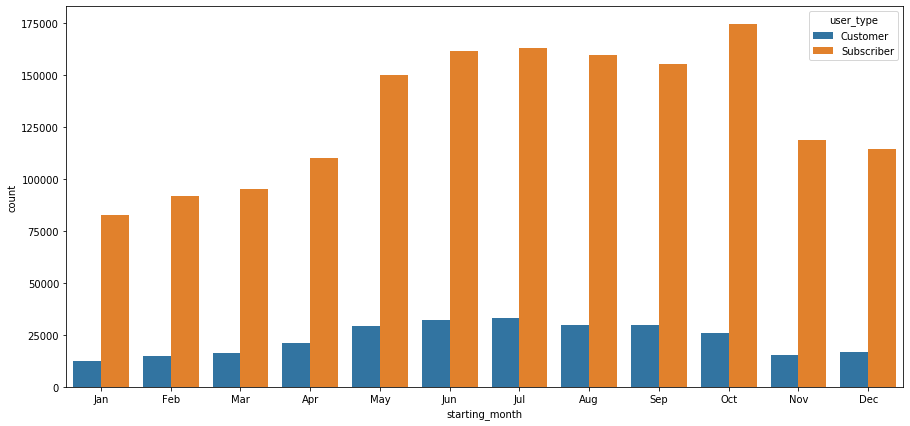

In [41]:
plt.figure(figsize = [15, 7]) 
sb.countplot(data=df, x='starting_month', hue='user_type');

**From the clunstered bar chart , we notice that the subscriber trips are always more than customer trips and the biggest difference is found on October month**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscribers users than customers.It seems that subscribers tend to use the bikes in every day life during route to work , while customers tend to ride bikes in the weekend as a funny sport to them . 
> There seems to be a constant difference between the number of subscribers trips and the number of customers trips all over the year , this differnce increases mainly in October where the number of subscribers trips are the highest 
> Subscribers trips duration are slightly shorter than customers trips duration , this is may be due to subscribers tend to have the shortest route to reach their work faster .
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

##### -<span style="color:red">Plotting the relation between trip Distance and Duration with respect to the user type 

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


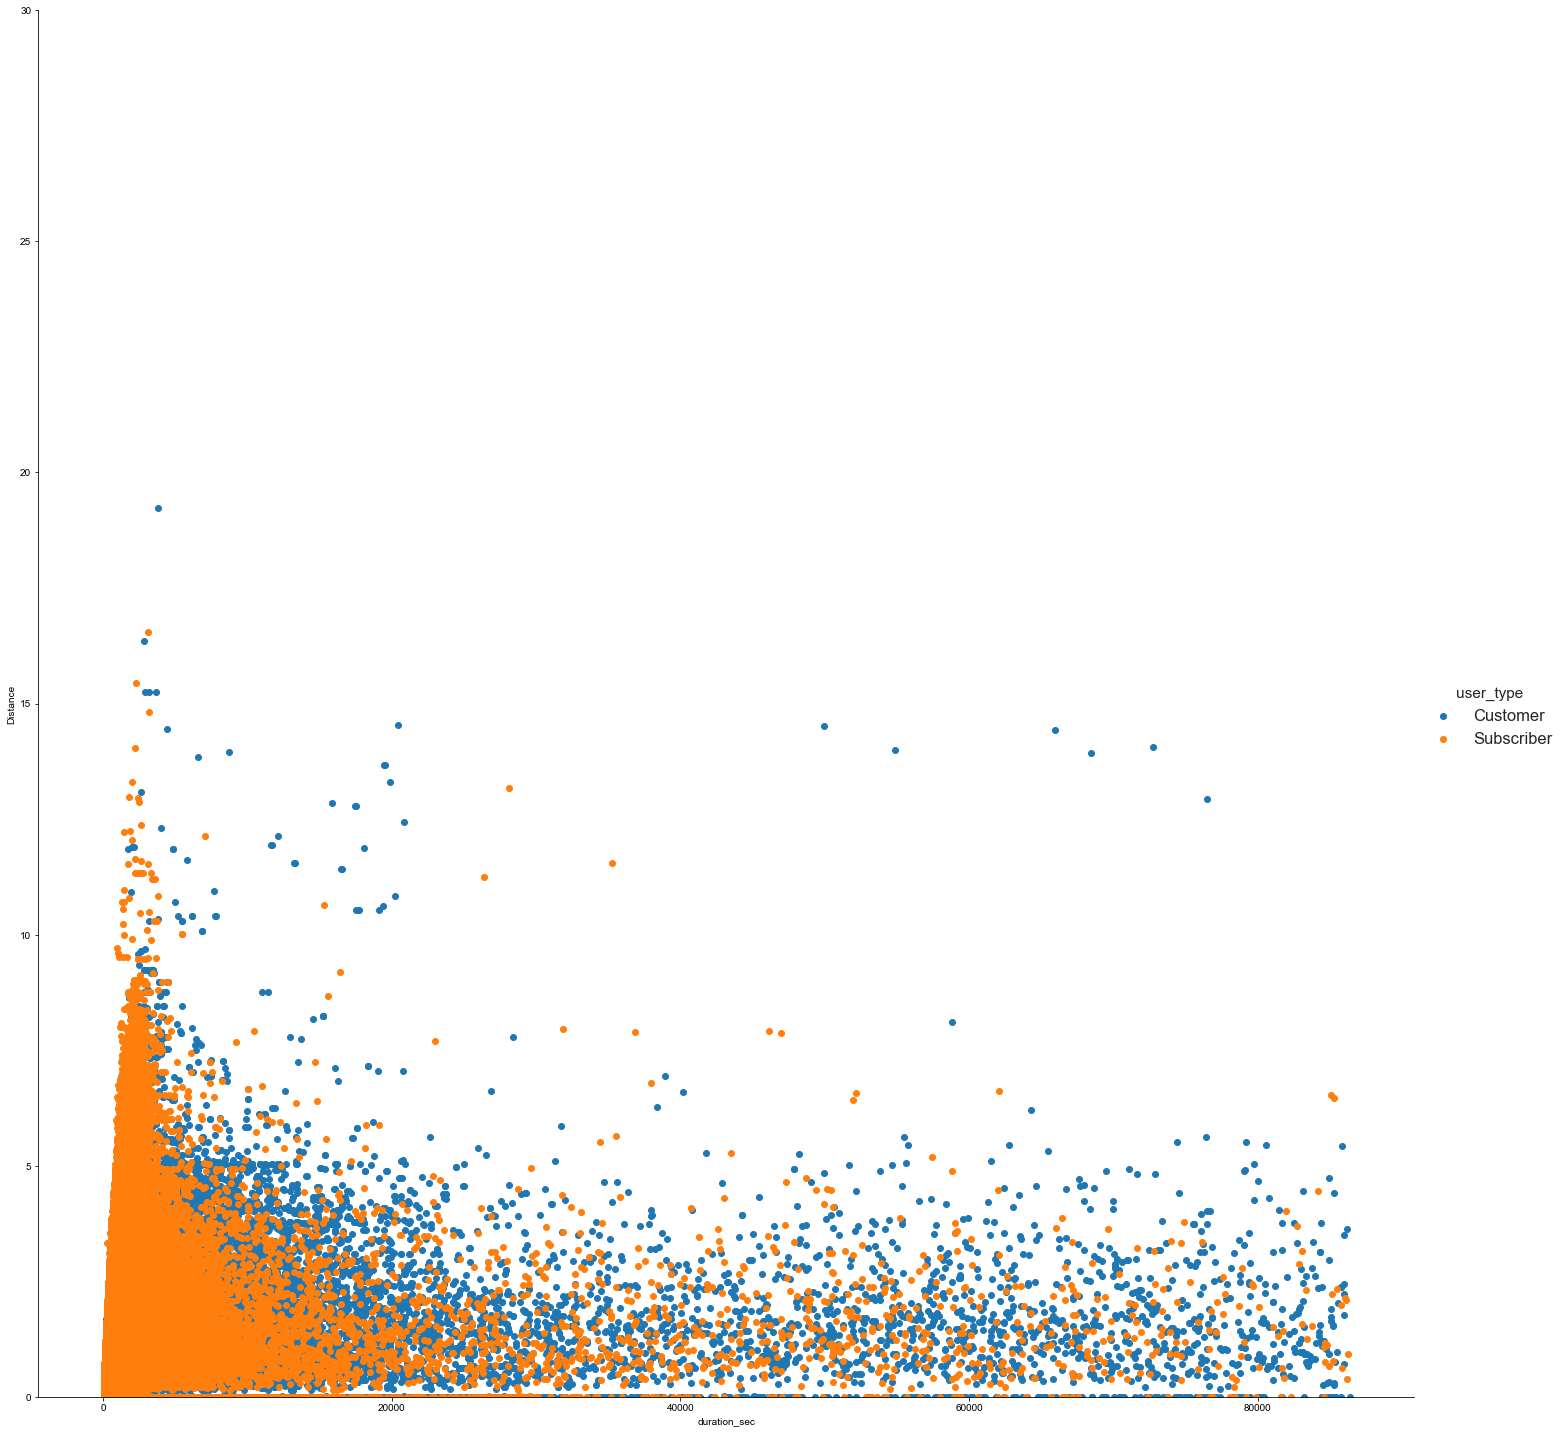

In [42]:
#from udacity lessons 

g = sb.FacetGrid(data = df, hue = 'user_type', size = 20 )
g.map(plt.scatter, 'duration_sec', 'Distance')
sb.set(font_scale=1.5)
plt.ylim(0,30)
g.add_legend()

**As we see in the scatter plot , subscriber users tend to have shorter trips with less duration than the customer users , Also the relation between the distance and the durations is somehow directly proportional , but it is not very obvious from the plot due to large number of trips whose distance equals to zero**

##### -<span style="color:red">Plotting the relation between Duration with and start hour of day with respect to the week day 

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


([<matplotlib.axis.YTick at 0xc4e0488>,
 <a list of 11 Text yticklabel objects>)

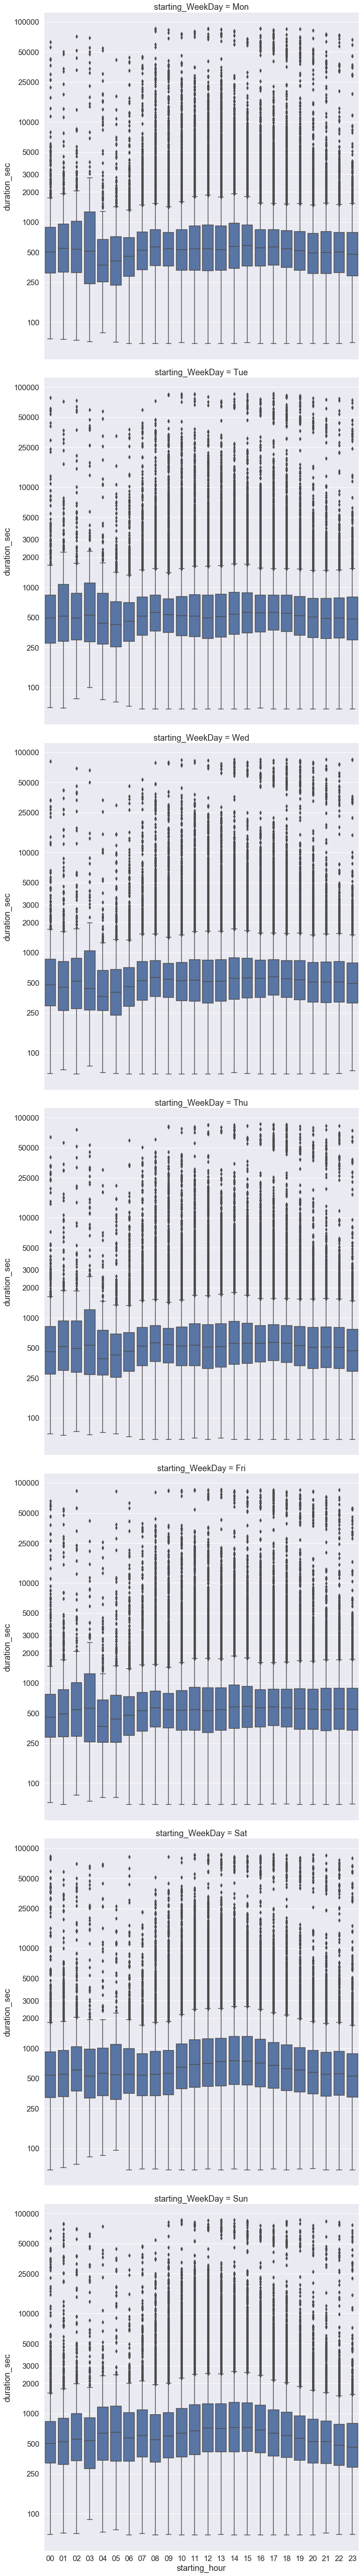

In [43]:
g = sb.FacetGrid(data = df, col = 'starting_WeekDay', size = 11 , col_wrap=1)
g.map(sb.boxplot, 'starting_hour', 'duration_sec')
plt.yscale('log')
tick_locs = [100,250, 500, 1000, 2000, 3000 , 5000, 10000 , 25000 , 50000 , 100000]
plt.yticks(tick_locs, tick_locs)

**We plotted faceted grid with box plots between starting hour of trip and the duration of the trip<br>
It is obviuos that in alldays of the week , the hours from 2 to 7 have low mean values in duration , while the hours from 14 to 18 have relativly higher mean values in trip duration** 

##### -<span style="color:red">Plotting the relation between count of trips in each day of week with respect to the user type and bike share for all trips .

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


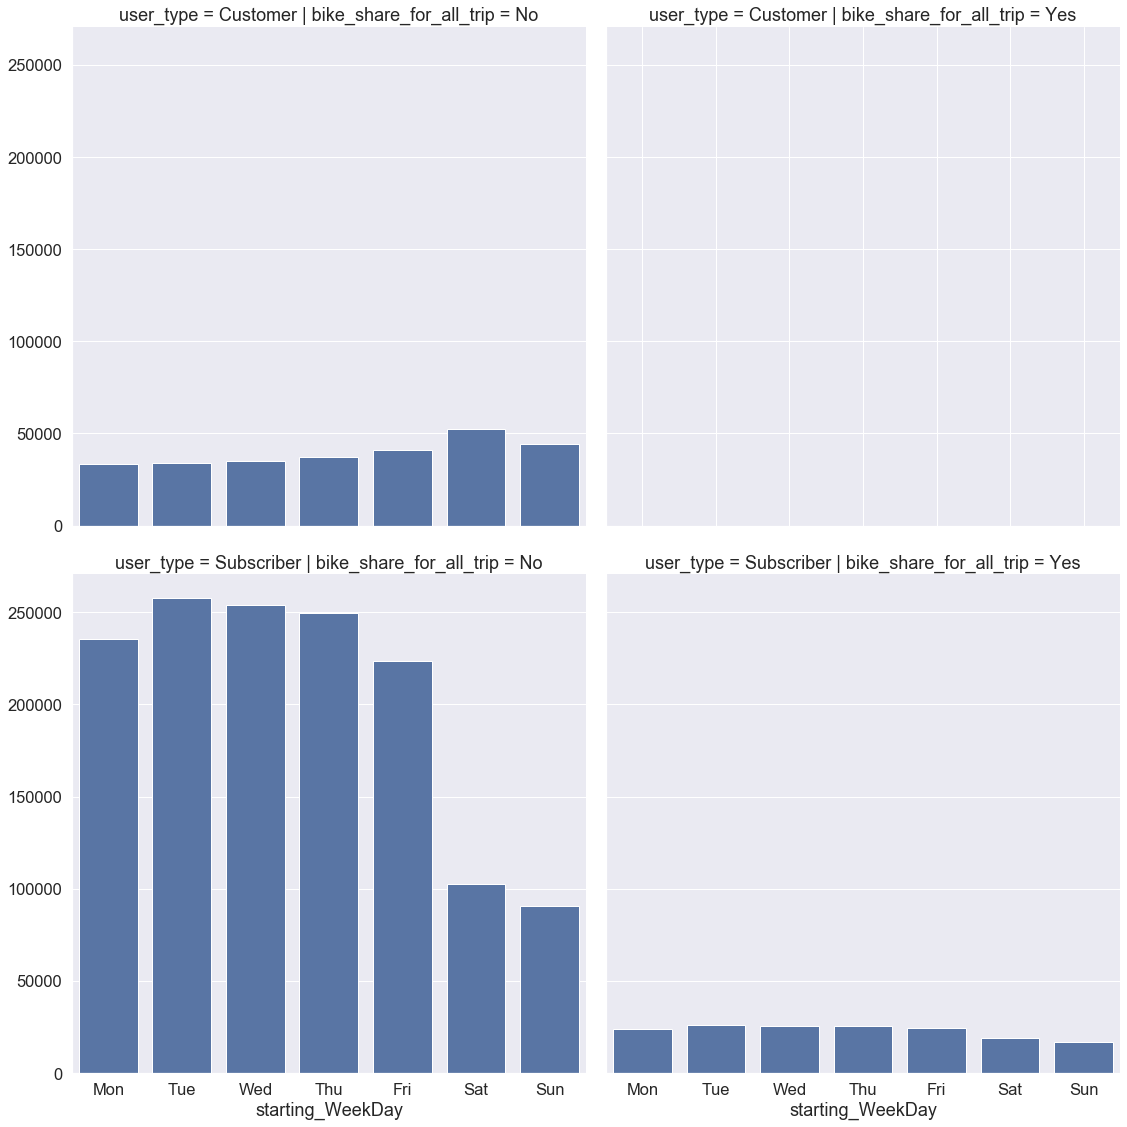

In [44]:

g = sb.FacetGrid(data = df, col = 'bike_share_for_all_trip', size = 8  , row ='user_type')
g.map(sb.countplot, 'starting_WeekDay' )


**From the above facetet grid , it is notices that the highest count of trips in all days of the week is for the subscriber user with no bikes shared , followed by the customer user with no bike shared also , and then for the user subscriber with bikes shared for all trips , it is notices that there is no trips for customer user with bikes shared all over the trips at all.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The most observed feature is that subscriber users are most likely to use bikes specially in week days and during the rush hours when going to work and returning back home , while the customer users tend to use bikes in the week end more than week days .

### Were there any interesting or surprising interactions between features?

> We expected the duration of the trips for subscribers users to be relativly less than customer users because they need to have shorther routes to reach work early 
> The relation between duration and the distance travelled is not very significant as some trips have round paths or a two-way trip .